An example of intializing and running an episode of the current market implementation

In [1]:
import matplotlib.pyplot as plt
import utility
import numpy as np
from market_model import Market

In [2]:
N=100
alpha = 1.5
p=0.0154
M = 100
t_end = 150

market = Market(N,alpha, p, M,t_end)

Initializing Market


In [3]:
market.run_market()

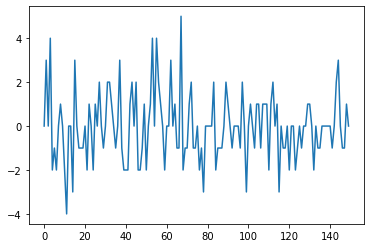

In [4]:
plt.plot(market.return_hist)

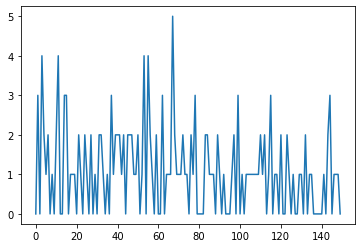

In [5]:
plt.plot(market.volatility_hist)

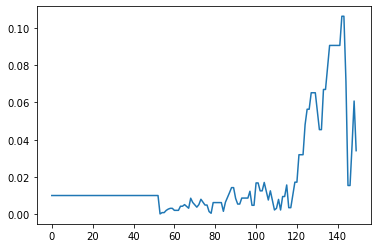

In [6]:
plt.plot(market.herding_hist)

Text(0.5, 0, 't (day)')

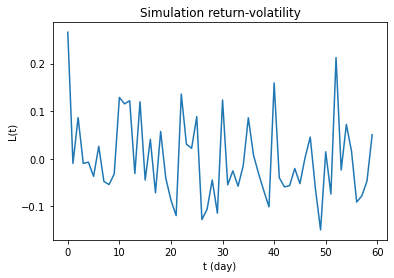

In [7]:
t_end = 60
ret_vol_cor=np.zeros(t_end)
for i in range(t_end):
    ret_vol_cor[i] = utility.calc_L(market.return_hist,i)
plt.plot(ret_vol_cor)
plt.title("Simulation return-volatility")
plt.ylabel("L(t)")
plt.xlabel("t (day)")